In [1]:
from transient_piezo_truss import * 
import matplotlib.pyplot as plt 
import numpy as np
%load_ext autoreload
%autoreload 2

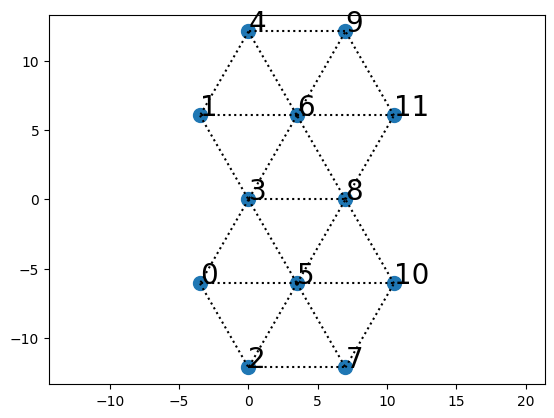

=== Q_Error:2.3305e-05 ===: 100%|██████████| 25/25 [02:08<00:00,  5.15s/it]


In [2]:
# Create a static_piezo_truss object
freq = [5,]
transient_piezo_truss = TransientPiezoTruss(freq=freq, load=True, path='Pol.npz')
# Plot the structure
transient_piezo_truss.plotStructure()
#
UNodes_free = [0, 1, 2]
u_free = np.zeros((3, len(freq), 2))
#
# UNodes_clamped = [20, 21, 22, 23]
# u_clamped = [[[1E-6, 2E-6]], [[5E-6, -4E-6]], [[3E-6, -3E-6]], [[-2E-6, 5E-6]]]
UNodes_clamped = [0, 1, 2, 20,]
u_clamped = [[[0, 0]], [[0, 0]], [[0, 0]], [[-2E-6, 5E-6]]]
#
T = np.linspace(0, 1, 1000)
N = len(T) // 2
Vol = np.ones((len(transient_piezo_truss.edges), len(freq), 2)) * 10
Vol[:, :, 1] = 0
#
Epoch = 25
lr = 1E10
err = 10.
# Vol = np.ones((len(transient_piezo_truss.edges), len(freq), 2)) * 10
pbar = tqdm.tqdm(range(Epoch))
for i in pbar:
    #
    pbar.set_description("=== Q_Error:{:.4e} ===".format(err))
    #
    transient_piezo_truss.solve(T, UNodes_free, u_free, V=Vol)
    Q_free = transient_piezo_truss.calQ.copy()
    #
    transient_piezo_truss.solve(T, UNodes_clamped, u_clamped, V=Vol)
    Q_clamped = transient_piezo_truss.calQ.copy()
    #
    for n, fq in enumerate(freq):
        Q_free_sin = 2 * Q_free[:, N:] @ np.sin(fq * 2 * np.pi * T[N:]) / len(T[N:])
        Q_free_cos = 2 * Q_free[:, N:] @ np.cos(fq * 2 * np.pi * T[N:]) / len(T[N:])
        #
        Q_clamped_sin = 2 * Q_clamped[:, N:] @ np.sin(fq * 2 * np.pi * T[N:]) / len(T[N:])
        Q_clamped_cos = 2 * Q_clamped[:, N:] @ np.cos(fq * 2 * np.pi * T[N:]) / len(T[N:])
        #
        Vol[:, n, 0] += lr * (Q_clamped_sin - Q_free_sin)
        Vol[:, n, 1] += lr * (Q_clamped_cos - Q_free_cos)
    #
    err = np.linalg.norm((Q_free-Q_clamped)[:, N:]) / np.linalg.norm(Q_free[:, N:])

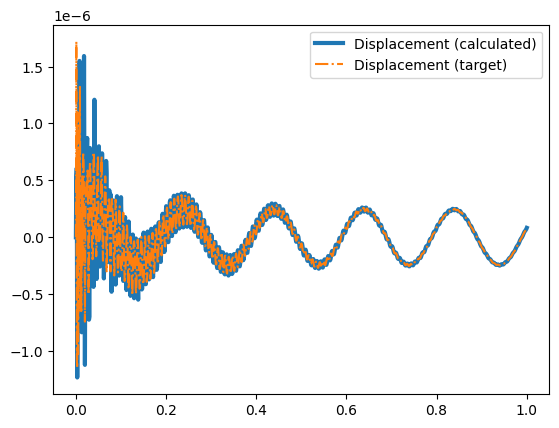

In [12]:
# Define error in tqdm 
#
import matplotlib.pyplot as plt 
#
transient_piezo_truss.solve(T, UNodes_free, u_free, V=Vol)
plt.plot(T, transient_piezo_truss.calDisp[11, 0, :], label="Displacement (calculated)", linewidth=3)
transient_piezo_truss.solve(T, UNodes_clamped, u_clamped, V=Vol)
plt.plot(T, transient_piezo_truss.calDisp[11, 0, :], label="Displacement (target)", linestyle="-.")
plt.legend()
plt.show()

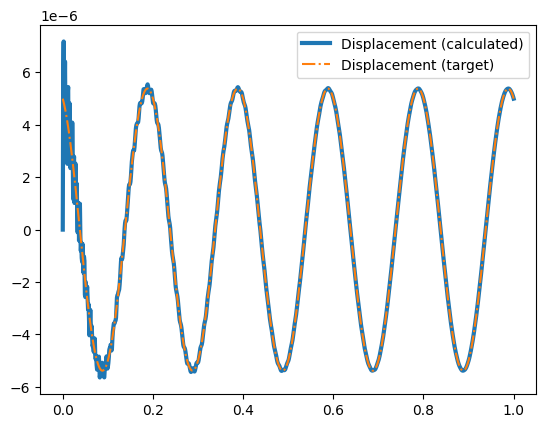

In [13]:
# Define error in tqdm 
#
import matplotlib.pyplot as plt 
#
transient_piezo_truss.solve(T, UNodes_free, u_free, V=Vol)
plt.plot(T, transient_piezo_truss.calDisp[10, 0, :], label="Displacement (calculated)", linewidth=3)
transient_piezo_truss.solve(T, UNodes_clamped, u_clamped, V=Vol)
plt.plot(T, transient_piezo_truss.calDisp[10, 0, :], label="Displacement (target)", linestyle="-.")
plt.legend()
plt.show()